In [1]:
#必要なライブラリのインポート
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import ShuffleSplit #ShuffleSplitクラスの呼び出し
from sklearn import svm, metrics #svmとmetricsを呼び出す
from sklearn.metrics import plot_confusion_matrix #混同行列の呼び出し
from sklearn.model_selection import train_test_split # train_test_splitの読み込み
from sklearn.ensemble import RandomForestClassifier #ランダムフォレストを使うためのライブラリ
from sklearn.model_selection import LeaveOneOut #交差検証(LeaveOneOut)を使うためのライブラリ
from sklearn.model_selection import cross_val_score #交差検証に必要なライブラリ
from sklearn.model_selection import learning_curve, GridSearchCV

In [2]:
#emotion_labelデータの読みこみ

data2_d_label_50 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_50.csv')
data2_d_label_60 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_60.csv')
data2_d_label_70 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_70.csv')
data2_d_label_80 = pd.read_csv('emotion_label/session2/D/emotion_D_20201111_2_80.csv')

# data2_a_label_50 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_50.csv')
# data2_a_label_60 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_60.csv')
# data2_a_label_70 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_70.csv')
# data2_a_label_80 = pd.read_csv('emotion_label/session1/D/emotion_D_20201111_2_80.csv')

#feature_data(特徴量データーセット)の読みこみ
data2_d_record_all_feature_50 = pd.read_csv('feature/D/data2_d_50_record_all_feature.csv')
data2_d_record_all_feature_60 = pd.read_csv('feature/D/data2_d_60_record_all_feature.csv')
data2_d_record_all_feature_70 = pd.read_csv('feature/D/data2_d_70_record_all_feature.csv')
data2_d_record_all_feature_80 = pd.read_csv('feature/D/data2_d_80_record_all_feature.csv')

# data2_a_record_all_feature_50 = pd.read_csv('feature/session1/D/data2_a_50_record_all_feature.csv')
# data2_a_record_all_feature_60 = pd.read_csv('feature/session1/D/data2_a_60_record_all_feature.csv')
# data2_a_record_all_feature_70 = pd.read_csv('feature/session1/D/data2_a_70_record_all_feature.csv')
# data2_a_record_all_feature_80 = pd.read_csv('feature/session1/D/data2_a_80_record_all_feature.csv')

# feature_emg = pd.read_csv("feature_emg.csv")

#確認
display(data2_d_record_all_feature_50)
display(data2_d_label_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accx_min,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak
0,2020-11-11 15:15:26,2020-11-11 15:15:30,10133.702,366.059,1741.423,-83.949,137.696,-8.688,32171.383196,21952.731519,...,9279,-266,446,-1884,-1914,-483,19.569472,57.485720,1.565558,223.900951
1,2020-11-11 15:15:27,2020-11-11 15:15:31,10117.939,388.032,1885.407,-78.158,179.754,-6.277,34328.931279,21947.632976,...,9279,-266,624,-1884,-1914,-483,15.264188,58.528294,0.391389,295.092728
2,2020-11-11 15:15:28,2020-11-11 15:15:32,10116.777,413.086,1888.432,-68.295,50.187,-10.756,44130.617271,27430.828604,...,9035,-266,-852,-3384,-7060,-483,14.872798,60.910638,3.131115,330.932346
3,2020-11-11 15:15:29,2020-11-11 15:15:33,10112.792,441.254,1904.253,-83.214,99.147,-3.277,38845.116736,22240.063484,...,9035,-151,-852,-3384,-7060,-349,15.655577,63.180340,3.131115,249.560027
4,2020-11-11 15:15:30,2020-11-11 15:15:34,10111.827,444.219,1917.354,-82.211,124.011,8.670,40142.643071,21681.669039,...,9035,-151,-852,-3384,-7060,-276,15.655577,71.515689,1.565558,544.763024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2020-11-11 15:29:48,2020-11-11 15:29:52,10000.664,501.229,2654.878,-86.638,133.310,8.483,29891.463104,17847.572559,...,9250,108,1173,-1506,-1103,-258,4.305284,66.950484,2.739726,152.106735
631,2020-11-11 15:29:49,2020-11-11 15:29:53,9977.277,481.756,2771.451,-67.069,162.840,12.955,35941.930271,14865.018464,...,9250,108,1173,-1171,-1103,-197,3.522505,103.975723,0.391389,198.667325
632,2020-11-11 15:29:50,2020-11-11 15:29:54,9959.142,471.557,2884.424,-77.482,149.689,8.854,40817.047836,13581.008751,...,9250,-4,1173,-1469,-1688,-306,3.131115,120.303234,0.391389,273.291607
633,2020-11-11 15:29:51,2020-11-11 15:29:55,9940.358,464.043,2969.096,-54.681,9.205,3.352,76200.579836,41838.507151,...,8733,-699,-669,-8091,-8005,-569,5.088063,87.352871,0.391389,456.293027


,start_time,finish_time,emotion_level,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,3:42,3:46,4,NaN,NaN,NaN
1,3:43,3:47,4,NaN,NaN,NaN
2,3:44,3:48,4,NaN,NaN,NaN
3,3:45,3:49,4,NaN,NaN,NaN
4,3:46,3:50,4,NaN,NaN,NaN
...,...,...,...,...,...,...
630,18:04,18:08,0,NaN,NaN,NaN
631,18:05,18:09,0,NaN,NaN,NaN
632,18:06,18:10,0,NaN,NaN,NaN
633,18:07,18:11,0,NaN,NaN,NaN


In [3]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=1)
    return a

data2_d_label_50 = dropna(data2_d_label_50)
data2_d_label_60 = dropna(data2_d_label_60)
data2_d_label_70 = dropna(data2_d_label_70)
data2_d_label_80 = dropna(data2_d_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [4]:
#欠損値削除
def dropna(label):
    a = label.dropna(how='all', axis=0)
    return a

data2_d_label_50 = dropna(data2_d_label_50)
data2_d_label_60 = dropna(data2_d_label_60)
data2_d_label_70 = dropna(data2_d_label_70)
data2_d_label_80 = dropna(data2_d_label_80)

# data2_a_label_50 = dropna(data2_a_label_50)
# data2_a_label_60 = dropna(data2_a_label_60)
# data2_a_label_70 = dropna(data2_c_label_70)
# data2_a_label_80 = dropna(data2_d_label_80)

In [5]:
#emotion_labelデータからtimeHMSとsubject列を消去

data2_d_label_50 = data2_d_label_50.drop(["start_time", "finish_time"], axis=1)
data2_d_label_60 = data2_d_label_60.drop(["start_time", "finish_time"], axis=1)
data2_d_label_70 = data2_d_label_70.drop(["start_time", "finish_time"], axis=1)
data2_d_label_80 = data2_d_label_80.drop(["start_time", "finish_time"], axis=1)

# data2_a_label_50 = data2_a_label_50.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_60 = data2_a_label_60.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_70 = data2_a_label_70.drop(["start_time", "finish_time"], axis=1)
# data2_a_label_80 = data2_a_label_80.drop(["start_time", "finish_time"], axis=1)

#確認
data2_d_label_50

,emotion_level
0,4
1,4
2,4
3,4
4,4
...,...
630,0
631,0
632,0
633,0


In [6]:
#feature_dataとemotion_labelデータを連結
data2_d_record_all_feature_50 = pd.concat([data2_d_record_all_feature_50, data2_d_label_50], axis=1, ignore_index=False)
data2_d_record_all_feature_60 = pd.concat([data2_d_record_all_feature_60, data2_d_label_60], axis=1, ignore_index=False)
data2_d_record_all_feature_70 = pd.concat([data2_d_record_all_feature_70, data2_d_label_70], axis=1, ignore_index=False)
data2_d_record_all_feature_80 = pd.concat([data2_d_record_all_feature_80, data2_d_label_80], axis=1, ignore_index=False)

# data2_a_record_all_feature_50 = pd.concat([data2_a_record_all_feature_50, data2_a_label_50], axis=1, ignore_index=False)
# data2_a_record_all_feature_60 = pd.concat([data2_a_record_all_feature_60, data2_a_label_60], axis=1, ignore_index=False)
# data2_a_record_all_feature_70 = pd.concat([data2_a_record_all_feature_70, data2_a_label_70], axis=1, ignore_index=False)
# data2_a_record_all_feature_80 = pd.concat([data2_a_record_all_feature_80, data2_a_label_80], axis=1, ignore_index=False)

#データの確認(確認のためセッション1のDさんのデータを表示している)
display(data2_d_record_all_feature_50)

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:26,2020-11-11 15:15:30,10133.702,366.059,1741.423,-83.949,137.696,-8.688,32171.383196,21952.731519,...,-266,446,-1884,-1914,-483,19.569472,57.485720,1.565558,223.900951,4
1,2020-11-11 15:15:27,2020-11-11 15:15:31,10117.939,388.032,1885.407,-78.158,179.754,-6.277,34328.931279,21947.632976,...,-266,624,-1884,-1914,-483,15.264188,58.528294,0.391389,295.092728,4
2,2020-11-11 15:15:28,2020-11-11 15:15:32,10116.777,413.086,1888.432,-68.295,50.187,-10.756,44130.617271,27430.828604,...,-266,-852,-3384,-7060,-483,14.872798,60.910638,3.131115,330.932346,4
3,2020-11-11 15:15:29,2020-11-11 15:15:33,10112.792,441.254,1904.253,-83.214,99.147,-3.277,38845.116736,22240.063484,...,-151,-852,-3384,-7060,-349,15.655577,63.180340,3.131115,249.560027,4
4,2020-11-11 15:15:30,2020-11-11 15:15:34,10111.827,444.219,1917.354,-82.211,124.011,8.670,40142.643071,21681.669039,...,-151,-852,-3384,-7060,-276,15.655577,71.515689,1.565558,544.763024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2020-11-11 15:29:48,2020-11-11 15:29:52,10000.664,501.229,2654.878,-86.638,133.310,8.483,29891.463104,17847.572559,...,108,1173,-1506,-1103,-258,4.305284,66.950484,2.739726,152.106735,0
631,2020-11-11 15:29:49,2020-11-11 15:29:53,9977.277,481.756,2771.451,-67.069,162.840,12.955,35941.930271,14865.018464,...,108,1173,-1171,-1103,-197,3.522505,103.975723,0.391389,198.667325,0
632,2020-11-11 15:29:50,2020-11-11 15:29:54,9959.142,471.557,2884.424,-77.482,149.689,8.854,40817.047836,13581.008751,...,-4,1173,-1469,-1688,-306,3.131115,120.303234,0.391389,273.291607,0
633,2020-11-11 15:29:51,2020-11-11 15:29:55,9940.358,464.043,2969.096,-54.681,9.205,3.352,76200.579836,41838.507151,...,-699,-669,-8091,-8005,-569,5.088063,87.352871,0.391389,456.293027,0


In [7]:
data2_d_record_all_feature_60

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,emotion_level
0,2020-11-11 15:15:27,2020-11-11 15:15:31,10117.939,388.032,1885.407,-78.158,179.754,-6.277,34328.931279,21947.632976,...,-266,624,-1884,-1914,-483,15.264188,58.528294,0.391389,295.092728,4
1,2020-11-11 15:15:28,2020-11-11 15:15:32,10116.777,413.086,1888.432,-68.295,50.187,-10.756,44130.617271,27430.828604,...,-266,-852,-3384,-7060,-483,14.872798,60.910638,3.131115,330.932346,4
2,2020-11-11 15:15:29,2020-11-11 15:15:33,10112.792,441.254,1904.253,-83.214,99.147,-3.277,38845.116736,22240.063484,...,-151,-852,-3384,-7060,-349,15.655577,63.180340,3.131115,249.560027,4
3,2020-11-11 15:15:30,2020-11-11 15:15:34,10111.827,444.219,1917.354,-82.211,124.011,8.670,40142.643071,21681.669039,...,-151,-852,-3384,-7060,-276,15.655577,71.515689,1.565558,544.763024,4
4,2020-11-11 15:15:31,2020-11-11 15:15:35,10102.328,433.485,1995.611,-60.279,122.559,18.521,46133.178416,21720.413775,...,-151,-852,-3384,-7060,-276,15.655577,76.134795,0.782779,644.794166,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2020-11-11 15:29:48,2020-11-11 15:29:52,10000.664,501.229,2654.878,-86.638,133.310,8.483,29891.463104,17847.572559,...,108,1173,-1506,-1103,-258,4.305284,66.950484,2.739726,152.106735,0
610,2020-11-11 15:29:49,2020-11-11 15:29:53,9977.277,481.756,2771.451,-67.069,162.840,12.955,35941.930271,14865.018464,...,108,1173,-1171,-1103,-197,3.522505,103.975723,0.391389,198.667325,0
611,2020-11-11 15:29:50,2020-11-11 15:29:54,9959.142,471.557,2884.424,-77.482,149.689,8.854,40817.047836,13581.008751,...,-4,1173,-1469,-1688,-306,3.131115,120.303234,0.391389,273.291607,0
612,2020-11-11 15:29:51,2020-11-11 15:29:55,9940.358,464.043,2969.096,-54.681,9.205,3.352,76200.579836,41838.507151,...,-699,-669,-8091,-8005,-569,5.088063,87.352871,0.391389,456.293027,0


In [8]:
print(len(data2_d_record_all_feature_50))
print(len(data2_d_record_all_feature_60))
print(len(data2_d_record_all_feature_70))
print(len(data2_d_record_all_feature_80))

635
614
592
570


In [9]:
#時間でデータを切り出している
#38→上から37行目までを抜き出している
data2_d_50_record_all_feature_1 = data2_d_record_all_feature_50.iloc[0:211]
data2_d_50_record_all_feature_2 = data2_d_record_all_feature_50.iloc[211:422]
data2_d_50_record_all_feature_3 = data2_d_record_all_feature_50.iloc[422:635]

data2_d_60_record_all_feature_1 = data2_d_record_all_feature_60.iloc[0:204]
data2_d_60_record_all_feature_2 = data2_d_record_all_feature_60.iloc[204:408]
data2_d_60_record_all_feature_3 = data2_d_record_all_feature_60.iloc[408:614]

data2_d_70_record_all_feature_1 = data2_d_record_all_feature_70.iloc[0:197]
data2_d_70_record_all_feature_2 = data2_d_record_all_feature_70.iloc[197:394]
data2_d_70_record_all_feature_3 = data2_d_record_all_feature_70.iloc[394:592]

data2_d_80_record_all_feature_1 = data2_d_record_all_feature_80.iloc[0:190]
data2_d_80_record_all_feature_2 = data2_d_record_all_feature_80.iloc[190:380]
data2_d_80_record_all_feature_3 = data2_d_record_all_feature_80.iloc[380:570]


# data2_d_50_record_all_feature_1 = data2_d_record_all_feature_50.iloc[0:150]
# data2_d_50_record_all_feature_2 = data2_d_record_all_feature_50.iloc[150:300]
# data2_d_50_record_all_feature_3 = data2_d_record_all_feature_50.iloc[300:470]

# data2_d_60_record_all_feature_1 = data2_d_record_all_feature_60.iloc[0:150]
# data2_d_60_record_all_feature_2 = data2_d_record_all_feature_60.iloc[150:300]
# data2_d_60_record_all_feature_3 = data2_d_record_all_feature_60.iloc[300:470]

# data2_d_70_record_all_feature_1 = data2_d_record_all_feature_70.iloc[0:150]
# data2_d_70_record_all_feature_2 = data2_d_record_all_feature_70.iloc[150:300]
# data2_d_70_record_all_feature_3 = data2_d_record_all_feature_70.iloc[300:470]

# data2_d_80_record_all_feature_1 = data2_d_record_all_feature_80.iloc[0:150]
# data2_d_80_record_all_feature_2 = data2_d_record_all_feature_80.iloc[150:300]
# data2_d_80_record_all_feature_3 = data2_d_record_all_feature_80.iloc[300:470]

In [10]:
# data2_a_50_record_all_feature_1 = data2_a_record_all_feature_50.iloc[0:38]
# data2_a_50_record_all_feature_2 = data2_a_record_all_feature_50.iloc[38:687]
# data2_a_50_record_all_feature_3 = data2_a_record_all_feature_50.iloc[471:687]

# data2_a_60_record_all_feature_1 = data2_a_record_all_feature_60.iloc[0:38]
# data2_a_60_record_all_feature_2 = data2_a_record_all_feature_60.iloc[38:687]
# data2_a_60_record_all_feature_3 = data2_a_record_all_feature_60.iloc[471:687]

# data2_a_70_record_all_feature_1 = data2_a_record_all_feature_70.iloc[0:38]
# data2_a_70_record_all_feature_2 = data2_a_record_all_feature_70.iloc[38:687]
# data2_a_70_record_all_feature_3 = data2_a_record_all_feature_70.iloc[471:687]

# data2_a_80_record_all_feature_1 = data2_a_record_all_feature_80.iloc[0:38]
# data2_a_80_record_all_feature_2 = data2_a_record_all_feature_80.iloc[38:687]
# data2_a_80_record_all_feature_3 = data2_a_record_all_feature_80.iloc[471:687]

In [11]:
# emotion_levelの列の数値によってlabelを振り分けている
# emotion_levelの列の数値が2より大きいときはpositive
# emotion_levelの列の数値が3より小さいときはother

def emotion_level_define(data_record_all_feature):
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] > 2, "label"] = "positive"
    data_record_all_feature.loc[data_record_all_feature["emotion_level"] <3, "label"] = "other"
    return data_record_all_feature

data2_d_50_record_all_feature_1 = emotion_level_define(data2_d_50_record_all_feature_1)
data2_d_50_record_all_feature_2 = emotion_level_define(data2_d_50_record_all_feature_2)
data2_d_50_record_all_feature_3 = emotion_level_define(data2_d_50_record_all_feature_3)

data2_d_60_record_all_feature_1 = emotion_level_define(data2_d_60_record_all_feature_1)
data2_d_60_record_all_feature_2 = emotion_level_define(data2_d_60_record_all_feature_2)
data2_d_60_record_all_feature_3 = emotion_level_define(data2_d_60_record_all_feature_3)

data2_d_70_record_all_feature_1 = emotion_level_define(data2_d_70_record_all_feature_1)
data2_d_70_record_all_feature_2 = emotion_level_define(data2_d_70_record_all_feature_2)
data2_d_70_record_all_feature_3 = emotion_level_define(data2_d_70_record_all_feature_3)

data2_d_80_record_all_feature_1 = emotion_level_define(data2_d_80_record_all_feature_1)
data2_d_80_record_all_feature_2 = emotion_level_define(data2_d_80_record_all_feature_2)
data2_d_80_record_all_feature_3 = emotion_level_define(data2_d_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_define(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_define(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_define(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_define(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_define(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_define(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_define(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_define(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_define(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_define(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_define(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_define(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
#特徴量データからemotion_level列を消去
def emotion_level_drop(data_record_all_feature):
    data_record_all_feature.drop(["emotion_level"], axis=1, inplace=True)
    return data_record_all_feature


data2_d_50_record_all_feature_1 = emotion_level_drop(data2_d_50_record_all_feature_1)
data2_d_50_record_all_feature_2 = emotion_level_drop(data2_d_50_record_all_feature_2)
data2_d_50_record_all_feature_3 = emotion_level_drop(data2_d_50_record_all_feature_3)

data2_d_60_record_all_feature_1 = emotion_level_drop(data2_d_60_record_all_feature_1)
data2_d_60_record_all_feature_2 = emotion_level_drop(data2_d_60_record_all_feature_2)
data2_d_60_record_all_feature_3 = emotion_level_drop(data2_d_60_record_all_feature_3)

data2_d_70_record_all_feature_1 = emotion_level_drop(data2_d_70_record_all_feature_1)
data2_d_70_record_all_feature_2 = emotion_level_drop(data2_d_70_record_all_feature_2)
data2_d_70_record_all_feature_3 = emotion_level_drop(data2_d_70_record_all_feature_3)

data2_d_80_record_all_feature_1 = emotion_level_drop(data2_d_80_record_all_feature_1)
data2_d_80_record_all_feature_2 = emotion_level_drop(data2_d_80_record_all_feature_2)
data2_d_80_record_all_feature_3 = emotion_level_drop(data2_d_80_record_all_feature_3)

# data2_a_50_record_all_feature_1 = emotion_level_drop(data2_a_50_record_all_feature_1)
# data2_a_50_record_all_feature_2 = emotion_level_drop(data2_a_50_record_all_feature_2)
# data2_a_50_record_all_feature_3 = emotion_level_drop(data2_a_50_record_all_feature_3)

# data2_a_60_record_all_feature_1 = emotion_level_drop(data2_a_60_record_all_feature_1)
# data2_a_60_record_all_feature_2 = emotion_level_drop(data2_a_60_record_all_feature_2)
# data2_a_60_record_all_feature_3 = emotion_level_drop(data2_a_60_record_all_feature_3)

# data2_a_70_record_all_feature_1 = emotion_level_drop(data2_a_70_record_all_feature_1)
# data2_a_70_record_all_feature_2 = emotion_level_drop(data2_a_70_record_all_feature_2)
# data2_a_70_record_all_feature_3 = emotion_level_drop(data2_a_70_record_all_feature_3)

# data2_a_80_record_all_feature_1 = emotion_level_drop(data2_a_80_record_all_feature_1)
# data2_a_80_record_all_feature_2 = emotion_level_drop(data2_a_80_record_all_feature_2)
# data2_a_80_record_all_feature_3 = emotion_level_drop(data2_a_80_record_all_feature_3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
data2_d_50_record_all_feature_1

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:26,2020-11-11 15:15:30,10133.702000,366.059000,1741.423000,-83.949000,137.696000,-8.688000,32171.383196,21952.731519,...,-266,446,-1884,-1914,-483,19.569472,57.485720,1.565558,223.900951,positive
1,2020-11-11 15:15:27,2020-11-11 15:15:31,10117.939000,388.032000,1885.407000,-78.158000,179.754000,-6.277000,34328.931279,21947.632976,...,-266,624,-1884,-1914,-483,15.264188,58.528294,0.391389,295.092728,positive
2,2020-11-11 15:15:28,2020-11-11 15:15:32,10116.777000,413.086000,1888.432000,-68.295000,50.187000,-10.756000,44130.617271,27430.828604,...,-266,-852,-3384,-7060,-483,14.872798,60.910638,3.131115,330.932346,positive
3,2020-11-11 15:15:29,2020-11-11 15:15:33,10112.792000,441.254000,1904.253000,-83.214000,99.147000,-3.277000,38845.116736,22240.063484,...,-151,-852,-3384,-7060,-349,15.655577,63.180340,3.131115,249.560027,positive
4,2020-11-11 15:15:30,2020-11-11 15:15:34,10111.827000,444.219000,1917.354000,-82.211000,124.011000,8.670000,40142.643071,21681.669039,...,-151,-852,-3384,-7060,-276,15.655577,71.515689,1.565558,544.763024,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-11-11 15:20:16,2020-11-11 15:20:20,10087.791000,471.361000,2083.697000,-33.550000,-82.152000,62.353000,22890.299319,25857.026679,...,-258,-85,-1152,-3036,-379,5.088063,42.143734,0.391389,233.594792,positive
207,2020-11-11 15:20:17,2020-11-11 15:20:21,10091.784000,376.964000,1614.567000,-57.223000,-52.967000,23.993000,40330.177344,43854.230704,...,-777,-1433,-1658,-3036,-1203,3.913894,40.350819,0.391389,98.612695,positive
208,2020-11-11 15:20:18,2020-11-11 15:20:22,10111.802220,322.274470,1465.869828,-53.119072,69.958628,57.582240,79771.407906,73859.985211,...,-777,-1433,-3250,-3676,-1203,9.393346,45.668154,0.782779,180.603184,positive
209,2020-11-11 15:20:19,2020-11-11 15:20:23,10100.281534,261.469223,1547.407669,-48.702321,153.601413,47.450050,83114.670486,73526.249053,...,-777,-1433,-3250,-3676,-1203,0.391389,98.083345,0.391389,620.453461,positive


In [14]:
#全データからpositiveの数を確認
data2_d_50_record_all_feature_positive_1 = data2_d_50_record_all_feature_1[data2_d_50_record_all_feature_1.label == "positive"]
data2_d_50_record_all_feature_positive_1 = data2_d_50_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_positive_1))

data2_d_50_record_all_feature_positive_2 = data2_d_50_record_all_feature_2[data2_d_50_record_all_feature_2.label == "positive"]
data2_d_50_record_all_feature_positive_2 = data2_d_50_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_positive_2))

data2_d_50_record_all_feature_positive_3 = data2_d_50_record_all_feature_3[data2_d_50_record_all_feature_3.label == "positive"]
data2_d_50_record_all_feature_positive_3 = data2_d_50_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_positive_3))

data2_d_60_record_all_feature_positive_1 = data2_d_60_record_all_feature_1[data2_d_60_record_all_feature_1.label == "positive"]
data2_d_60_record_all_feature_positive_1 = data2_d_60_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_positive_1))

data2_d_60_record_all_feature_positive_2 = data2_d_60_record_all_feature_2[data2_d_60_record_all_feature_2.label == "positive"]
data2_d_60_record_all_feature_positive_2 = data2_d_60_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_positive_2))

data2_d_60_record_all_feature_positive_3 = data2_d_60_record_all_feature_3[data2_d_60_record_all_feature_3.label == "positive"]
data2_d_60_record_all_feature_positive_3 = data2_d_60_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_positive_3))

data2_d_70_record_all_feature_positive_1 = data2_d_70_record_all_feature_1[data2_d_70_record_all_feature_1.label == "positive"]
data2_d_670_record_all_feature_positive_1 = data2_d_70_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_positive_1))

data2_d_70_record_all_feature_positive_2 = data2_d_70_record_all_feature_2[data2_d_70_record_all_feature_2.label == "positive"]
data2_d_70_record_all_feature_positive_2 = data2_d_70_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_positive_2))

data2_d_70_record_all_feature_positive_3 = data2_d_70_record_all_feature_3[data2_d_70_record_all_feature_3.label == "positive"]
data2_d_70_record_all_feature_positive_3 = data2_d_70_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_positive_3))

data2_d_80_record_all_feature_positive_1 = data2_d_80_record_all_feature_1[data2_d_80_record_all_feature_1.label == "positive"]
data2_d_80_record_all_feature_positive_1 = data2_d_80_record_all_feature_positive_1.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_positive_1))

data2_d_80_record_all_feature_positive_2 = data2_d_80_record_all_feature_2[data2_d_80_record_all_feature_2.label == "positive"]
data2_d_80_record_all_feature_positive_2 = data2_d_80_record_all_feature_positive_2.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_positive_2))

data2_d_80_record_all_feature_positive_3 = data2_d_80_record_all_feature_3[data2_d_80_record_all_feature_3.label == "positive"]
data2_d_80_record_all_feature_positive_3 = data2_d_80_record_all_feature_positive_3.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_positive_3))

141
99
164
136
96
161
129
93
155
123
91
150


In [15]:
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "positive"]
# data2_a_50_record_all_feature_positive_1 = data2_a_50_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_1))

# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "positive"]
# data2_a_50_record_all_feature_positive_2 = data2_a_50_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_2))

# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "positive"]
# data2_a_50_record_all_feature_positive_3 = data2_a_50_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_positive_3))

# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "positive"]
# data2_a_60_record_all_feature_positive_1 = data2_a_60_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_1))

# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "positive"]
# data2_a_60_record_all_feature_positive_2 = data2_a_60_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_2))

# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "positive"]
# data2_a_60_record_all_feature_positive_3 = data2_a_60_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_positive_3))

# data2_a_70_record_all_feature_positive_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "positive"]
# data2_a_670_record_all_feature_positive_1 = data2_a_70_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_1))

# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "positive"]
# data2_a_70_record_all_feature_positive_2 = data2_a_70_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_2))

# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "positive"]
# data2_a_70_record_all_feature_positive_3 = data2_a_70_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_positive_3))

# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_1[data2_a_80_record_all_feature_1.label == "positive"]
# data2_a_80_record_all_feature_positive_1 = data2_a_80_record_all_feature_positive_1.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_1))

# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "positive"]
# data2_a_80_record_all_feature_positive_2 = data2_a_80_record_all_feature_positive_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_2))

# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "positive"]
# data2_a_80_record_all_feature_positive_3 = data2_a_80_record_all_feature_positive_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_positive_3))

In [16]:
# #全データからotherの数を確認
data2_d_50_record_all_feature_other_1 = data2_d_50_record_all_feature_1[data2_d_50_record_all_feature_1.label == "other"]
data2_d_50_record_all_feature_other_1 = data2_d_50_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_other_1))

data2_d_50_record_all_feature_other_2 = data2_d_50_record_all_feature_2[data2_d_50_record_all_feature_2.label == "other"]
data2_d_50_record_all_feature_other_2 = data2_d_50_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_other_2))

data2_d_50_record_all_feature_other_3 = data2_d_50_record_all_feature_3[data2_d_50_record_all_feature_3.label == "other"]
data2_d_50_record_all_feature_other_3 = data2_d_50_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_50_record_all_feature_other_3))

data2_d_60_record_all_feature_other_2 = data2_d_60_record_all_feature_2[data2_d_60_record_all_feature_2.label == "other"]
data2_d_60_record_all_feature_other_2 = data2_d_60_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_other_2))

data2_d_60_record_all_feature_other_3 = data2_d_60_record_all_feature_3[data2_d_60_record_all_feature_3.label == "other"]
data2_d_60_record_all_feature_other_3 = data2_d_60_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_other_3))

data2_d_60_record_all_feature_other_1 = data2_d_60_record_all_feature_1[data2_d_60_record_all_feature_1.label == "other"]
data2_d_60_record_all_feature_other_1 = data2_d_60_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_d_60_record_all_feature_other_1))

data2_d_70_record_all_feature_other_2 = data2_d_70_record_all_feature_2[data2_d_70_record_all_feature_2.label == "other"]
data2_d_70_record_all_feature_other_2 = data2_d_70_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_other_2))

data2_d_70_record_all_feature_other_3 = data2_d_70_record_all_feature_3[data2_d_70_record_all_feature_3.label == "other"]
data2_d_70_record_all_feature_other_3 = data2_d_70_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_other_3))

data2_d_70_record_all_feature_other_1 = data2_d_70_record_all_feature_1[data2_d_70_record_all_feature_1.label == "other"]
data2_d_70_record_all_feature_other_1 = data2_d_70_record_all_feature_other_1.reset_index(drop=True)
print(len(data2_d_70_record_all_feature_other_1))

data2_d_80_record_all_feature_other_2 = data2_d_80_record_all_feature_2[data2_d_80_record_all_feature_2.label == "other"]
data2_d_80_record_all_feature_other_2 = data2_d_80_record_all_feature_other_2.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_other_2))

data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_3[data2_d_80_record_all_feature_3.label == "other"]
data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_other_3))

data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_3[data2_d_80_record_all_feature_3.label == "other"]
data2_d_80_record_all_feature_other_3 = data2_d_80_record_all_feature_other_3.reset_index(drop=True)
print(len(data2_d_80_record_all_feature_other_3))

70
112
49
108
45
68
104
43
68
99
40
40


In [17]:
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_1[data2_a_50_record_all_feature_1.label == "other"]
# data2_a_50_record_all_feature_other_1 = data2_a_50_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_1))

# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_2[data2_a_50_record_all_feature_2.label == "other"]
# data2_a_50_record_all_feature_other_2 = data2_a_50_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_2))

# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_3[data2_a_50_record_all_feature_3.label == "other"]
# data2_a_50_record_all_feature_other_3 = data2_a_50_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_50_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_2[data2_a_60_record_all_feature_2.label == "other"]
# data2_a_60_record_all_feature_other_2 = data2_a_60_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_2))

# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_3[data2_a_60_record_all_feature_3.label == "other"]
# data2_a_60_record_all_feature_other_3 = data2_a_60_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_3))

# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_1[data2_a_60_record_all_feature_1.label == "other"]
# data2_a_60_record_all_feature_other_1 = data2_a_60_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_60_record_all_feature_other_1))

# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_2[data2_a_70_record_all_feature_2.label == "other"]
# data2_a_70_record_all_feature_other_2 = data2_a_70_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_2))

# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_3[data2_a_70_record_all_feature_3.label == "other"]
# data2_a_70_record_all_feature_other_3 = data2_a_70_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_3))

# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_1[data2_a_70_record_all_feature_1.label == "other"]
# data2_a_70_record_all_feature_other_1 = data2_a_70_record_all_feature_other_1.reset_index(drop=True)
# print(len(data2_a_70_record_all_feature_other_1))

# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_2[data2_a_80_record_all_feature_2.label == "other"]
# data2_a_80_record_all_feature_other_2 = data2_a_80_record_all_feature_other_2.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_2))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_3[data2_a_80_record_all_feature_3.label == "other"]
# data2_a_80_record_all_feature_other_3 = data2_a_80_record_all_feature_other_3.reset_index(drop=True)
# print(len(data2_a_80_record_all_feature_other_3))

In [18]:
#学習データとテストデータに分ける

train_data = pd.concat([data2_d_50_record_all_feature_1, data2_d_50_record_all_feature_2], ignore_index=True)
test_data = data2_d_50_record_all_feature_3

In [19]:
train_data

,start_time,finish_time,accx_mean,accy_mean,accz_mean,gyrx_mean,gyry_mean,gyrz_mean,accx_var,accy_var,...,accy_min,accz_min,gyrx_min,gyry_min,gyrz_min,accn_max_fq,accn_max_peak,gyrn_max_fq,gyrn_max_peak,label
0,2020-11-11 15:15:26,2020-11-11 15:15:30,10133.702,366.059,1741.423,-83.949,137.696,-8.688,32171.383196,21952.731519,...,-266,446,-1884,-1914,-483,19.569472,57.485720,1.565558,223.900951,positive
1,2020-11-11 15:15:27,2020-11-11 15:15:31,10117.939,388.032,1885.407,-78.158,179.754,-6.277,34328.931279,21947.632976,...,-266,624,-1884,-1914,-483,15.264188,58.528294,0.391389,295.092728,positive
2,2020-11-11 15:15:28,2020-11-11 15:15:32,10116.777,413.086,1888.432,-68.295,50.187,-10.756,44130.617271,27430.828604,...,-266,-852,-3384,-7060,-483,14.872798,60.910638,3.131115,330.932346,positive
3,2020-11-11 15:15:29,2020-11-11 15:15:33,10112.792,441.254,1904.253,-83.214,99.147,-3.277,38845.116736,22240.063484,...,-151,-852,-3384,-7060,-349,15.655577,63.180340,3.131115,249.560027,positive
4,2020-11-11 15:15:30,2020-11-11 15:15:34,10111.827,444.219,1917.354,-82.211,124.011,8.670,40142.643071,21681.669039,...,-151,-852,-3384,-7060,-276,15.655577,71.515689,1.565558,544.763024,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,2020-11-11 15:25:15,2020-11-11 15:25:19,10052.334,647.600,2243.804,-43.920,54.524,15.069,21271.288444,23228.788000,...,-139,741,-1732,-1389,-495,9.393346,48.173774,0.391389,333.832790,positive
418,2020-11-11 15:25:16,2020-11-11 15:25:20,10073.401,610.565,2118.141,-65.133,14.733,33.582,21210.992199,22623.099775,...,-139,741,-1732,-1389,-239,5.088063,53.848547,0.391389,164.201108,positive
419,2020-11-11 15:25:17,2020-11-11 15:25:21,10082.873,563.785,2070.358,-76.098,77.088,28.230,23442.218871,23512.330775,...,-139,741,-1732,-1639,-239,5.479452,47.827953,0.391389,224.189421,positive
420,2020-11-11 15:25:18,2020-11-11 15:25:22,10093.823,535.532,2010.422,-74.550,47.635,17.519,21731.643671,21708.718976,...,-139,741,-1732,-1639,-239,3.913894,75.906058,0.391389,251.933285,positive


In [20]:
X_train = train_data.iloc[0:,2:30]
y_train = train_data.label

X_test = test_data.iloc[0:,2:30]
y_test = test_data.label

# X_train = train_data.iloc[0:,2:28]
# y_train = test_data.iloc[0:,2:28]

# X_test = train_data.label
# y_test = test_data.label

In [21]:
# random = RandomForestClassifier(random_state=42)
# loo=LeaveOneOut()

# score = cross_val_score(random, X, y, cv = 5)
# print(score.mean())
# print(score)

正答率0.5821596244131455
誤った個数：89
classification report
              precision    recall  f1-score   support

       other       0.14      0.16      0.15        49
    positive       0.74      0.71      0.72       164

    accuracy                           0.58       213
   macro avg       0.44      0.44      0.44       213
weighted avg       0.60      0.58      0.59       213

Confusion matrix, without normalization
[[  8  41]
 [ 48 116]]


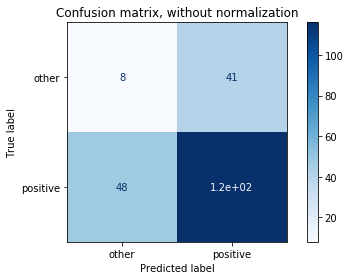

Normalized confusion matrix
[[0.16326531 0.83673469]
 [0.29268293 0.70731707]]


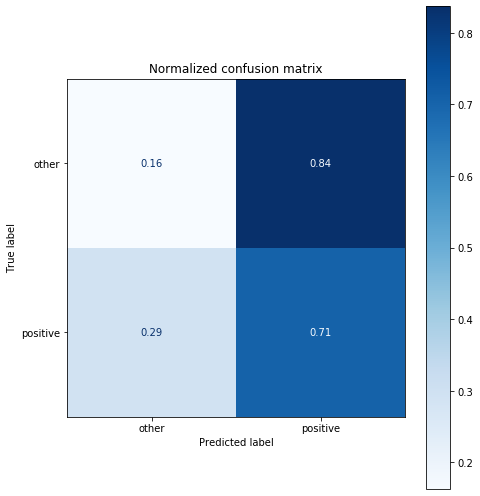

In [22]:
random = RandomForestClassifier(random_state=42)
# random = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth= 2, max_features= 10, min_samples_leaf= 3, min_samples_split= 2, n_estimators= 300)
random.fit(X_train, y_train)

level_names = ["other", "positive"]

# モデルの学習結果を評価する
accuracy = random.score(X_test, y_test)    # テストデータで試す
print(f"正答率{accuracy}")
predicted = random.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

# 詳しいレポート
print("classification report")
print(metrics.classification_report(y_test, predicted))

#混同行列の作成
class_names = level_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(random, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.rcParams["figure.figsize"] = (7, 7)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.tight_layout()
    plt.show()

# 特徴量選択

In [23]:
other = "0"
positive = "1"

X_train = pd.DataFrame(X_train)
X_train = X_train.reset_index(drop=True)
X_train_time = data2_d_record_all_feature_50.iloc[0:380]
X_train_time = X_train_time.iloc[0:,0:2]
X_train_time = X_train_time.reset_index(drop=True)
X_train_time = pd.concat([X_train_time, y_train], axis=1)
X_train_time.columns = ["start", "finish", "emotion_level"]
X_train_time.loc[X_train_time["emotion_level"] == "other", "label"] = 0
X_train_time.loc[X_train_time["emotion_level"] == "positive", "label"] = 1
X_train_time

y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop=True)
y_test_time = data2_d_record_all_feature_50.iloc[380:570]
y_test_time = y_test_time.iloc[0:,0:2]
y_test_time = y_test_time.reset_index(drop=True)
y_test_time = pd.concat([y_test_time, y_test], axis=1)
y_test_time.columns = ["start", "finish", "emotion_level"]
y_test_time.loc[y_test_time["emotion_level"] == "other", "label"] = 0
y_test_time.loc[y_test_time["emotion_level"] == "positive", "label"] = 1
y_test_time

predicted = pd.DataFrame(predicted)
predict_time = data2_d_record_all_feature_50.iloc[380:570]
predict_time = predict_time.iloc[0:,0:2]
predict_time = predict_time.reset_index(drop=True)
predict_time = pd.concat([predict_time, predicted], axis=1)
predict_time.columns = ["start", "finish", "emotion_level"]
predict_time.loc[predict_time["emotion_level"] == "other", "label"] = 0
predict_time.loc[predict_time["emotion_level"] == "positive", "label"] = 1
predict_time

,start,finish,emotion_level,label
0,2020-11-11 15:24:30,2020-11-11 15:24:34,positive,1.0
1,2020-11-11 15:24:31,2020-11-11 15:24:35,positive,1.0
2,2020-11-11 15:24:32,2020-11-11 15:24:36,other,0.0
3,2020-11-11 15:24:33,2020-11-11 15:24:37,positive,1.0
4,2020-11-11 15:24:34,2020-11-11 15:24:38,positive,1.0
...,...,...,...,...
208,NaN,NaN,positive,1.0
209,NaN,NaN,positive,1.0
210,NaN,NaN,positive,1.0
211,NaN,NaN,positive,1.0


In [24]:
y_test_time

,start,finish,emotion_level,label
0,2020-11-11 15:24:30,2020-11-11 15:24:34,positive,1.0
1,2020-11-11 15:24:31,2020-11-11 15:24:35,positive,1.0
2,2020-11-11 15:24:32,2020-11-11 15:24:36,positive,1.0
3,2020-11-11 15:24:33,2020-11-11 15:24:37,positive,1.0
4,2020-11-11 15:24:34,2020-11-11 15:24:38,positive,1.0
...,...,...,...,...
208,NaN,NaN,other,0.0
209,NaN,NaN,other,0.0
210,NaN,NaN,other,0.0
211,NaN,NaN,other,0.0


In [25]:
test = pd.concat([X_train_time, y_test_time], ignore_index=True, axis=0)
predicted = predict_time

In [26]:
test["start"] = pd.to_datetime(test['start'])
predicted["start"] = pd.to_datetime(predicted['start'])

test.set_index("start", inplace=True)
predicted.set_index("start", inplace=True)

In [27]:
test

,finish,emotion_level,label
start,,,
2020-11-11 15:15:26,2020-11-11 15:15:30,positive,1.0
2020-11-11 15:15:27,2020-11-11 15:15:31,positive,1.0
2020-11-11 15:15:28,2020-11-11 15:15:32,positive,1.0
2020-11-11 15:15:29,2020-11-11 15:15:33,positive,1.0
2020-11-11 15:15:30,2020-11-11 15:15:34,positive,1.0
...,...,...,...
NaT,NaN,other,0.0
NaT,NaN,other,0.0
NaT,NaN,other,0.0


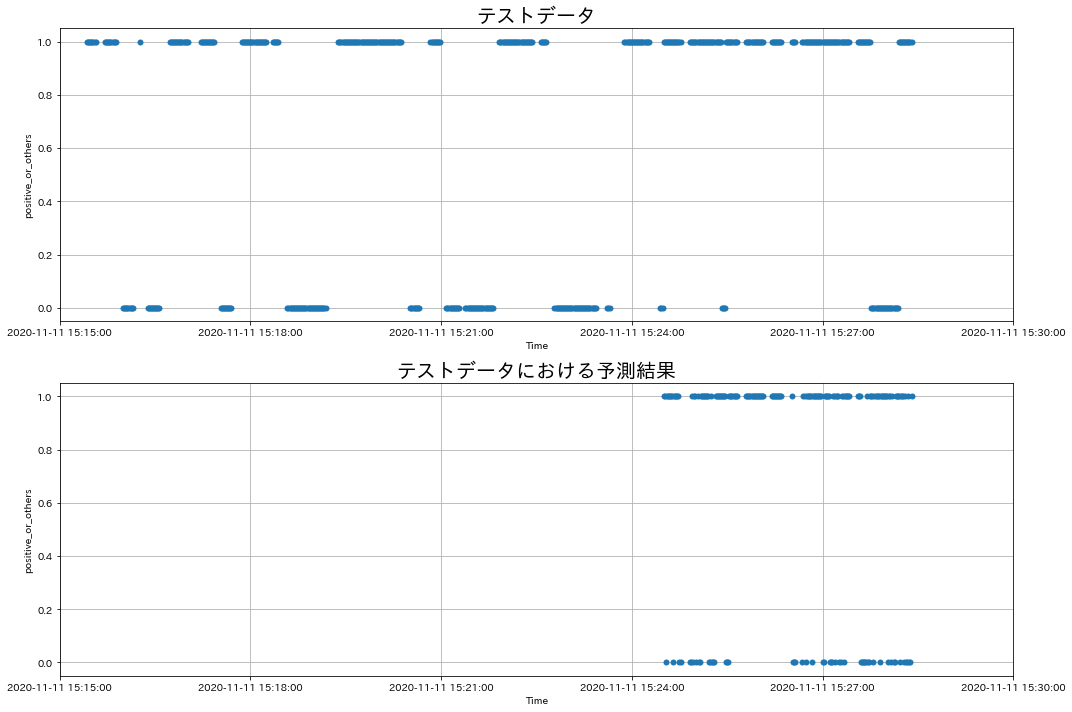

In [28]:
import datetime
import matplotlib.dates as mdates
import japanize_matplotlib

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(test.index, test["label"], marker="o", markeredgewidth=0,linewidth=0)
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax1.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
# ax1.set_ylim(0, 1)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax1.set_title("テストデータ", fontsize=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("positive_or_others")
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(predicted.index, predicted["label"], marker="o", markeredgewidth=0,linewidth=0)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax2.set_xlim(datetime.datetime(2020,11,11,15,15,0), datetime.datetime(2020,11,11,15,30,0))
ax2.xaxis.set_major_locator(mdates.MinuteLocator(range(15, 31, 3)))
ax2.set_title("テストデータにおける予測結果", fontsize=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("positive_or_others")
ax2.grid(True)

plt.tight_layout()